# About Dataset
## Context
This dataset contains rows of known fraud and valid transactions made over Ethereum, a type of cryptocurrency. This dataset is imbalanced, so keep that in mind when modelling

## Content
Here is a description of the rows of the dataset:

- Index: the index number of a row
- Address: the address of the ethereum account
- FLAG: whether the transaction is fraud or not
- Avg min between sent tnx: Average time between sent transactions for account in minutes
- Avg min between received tnx: Average time between received transactions for account in minutes
- Time Diff between first and_last (Mins): Time difference between the first and last transaction
- Sent_tnx: Total number of sent normal transactions
- Received_tnx: Total number of received normal transactions
- NumberofCreated_Contracts: Total Number of created contract transactions
- UniqueReceivedFrom_Addresses: Total Unique addresses from which account received transaction
- UniqueSentTo_Addresses20: Total Unique addresses from which account sent transactions
- MinValueReceived: Minimum value in Ether ever received
- MaxValueReceived: Maximum value in Ether ever received
- AvgValueReceived5Average value in Ether ever received
- MinValSent: Minimum value of Ether ever sent
- MaxValSent: Maximum value of Ether ever sent
- AvgValSent: Average value of Ether ever sent
- MinValueSentToContract: Minimum value of Ether sent to a contract
- MaxValueSentToContract: Maximum value of Ether sent to a contract
- AvgValueSentToContract: Average value of Ether sent to contracts
- TotalTransactions(IncludingTnxtoCreate_Contract): Total number of transactions
- TotalEtherSent:Total Ether sent for account address
- TotalEtherReceived: Total Ether received for account address
- TotalEtherSent_Contracts: Total Ether sent to Contract addresses
- TotalEtherBalance: Total Ether Balance following enacted transactions
- TotalERC20Tnxs: Total number of ERC20 token transfer transactions
- ERC20TotalEther_Received: Total ERC20 token received transactions in Ether
- ERC20TotalEther_Sent: Total ERC20token sent transactions in Ether
- ERC20TotalEtherSentContract: Total ERC20 token transfer to other contracts in Ether
- ERC20UniqSent_Addr: Number of ERC20 token transactions sent to Unique account addresses
- ERC20UniqRec_Addr: Number of ERC20 token transactions received from Unique addresses
- ERC20UniqRecContractAddr: Number of ERC20token transactions received from Unique contract addresses
- ERC20AvgTimeBetweenSent_Tnx: Average time between ERC20 token sent transactions in minutes
- ERC20AvgTimeBetweenRec_Tnx: Average time between ERC20 token received transactions in minutes
- ERC20AvgTimeBetweenContract_Tnx: Average time ERC20 token between sent token transactions
- ERC20MinVal_Rec: Minimum value in Ether received from ERC20 token transactions for account
- ERC20MaxVal_Rec: Maximum value in Ether received from ERC20 token transactions for account
- ERC20AvgVal_Rec: Average value in Ether received from ERC20 token transactions for account
- ERC20MinVal_Sent: Minimum value in Ether sent from ERC20 token transactions for account
- ERC20MaxVal_Sent: Maximum value in Ether sent from ERC20 token transactions for account
- ERC20AvgVal_Sent: Average value in Ether sent from ERC20 token transactions for account
- ERC20UniqSentTokenName: Number of Unique ERC20 tokens transferred
- RC20UniqRecTokenName: Number of Unique ERC20 tokens received
- ERC20MostSentTokenType: Most sent token for account via ERC20 transaction
- ERC20MostRecTokenType: Most received token for account via ERC20 transactions

# Libraries

In [5]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PowerTransformer
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc, classification_report, ConfusionMatrixDisplay, average_precision_score, precision_recall_curve
import pickle

# DNN
from keras.models import Sequential
from keras import initializers, regularizers
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow import random

In [7]:
# Set the random seed for reproducibility
random.set_seed(42)

# Load Google Drive

In [8]:
# from google.colab import drive
# drive.mount('/drive')

# Load Dataset

In [9]:
filename = 'transaction_dataset.csv'

In [10]:
# Count dataset number of lines to inform the dataset size first
def count_dataset_rows(file_name):
    fp = open(file_name,'r')
    for line_count, line in enumerate(fp):
        pass
    return line_count

file_line_count = count_dataset_rows(filename)
print('file_line_count for transaction_dataset.csv: ', file_line_count)

file_line_count for transaction_dataset.csv:  9841


In [11]:
df = pd.read_csv(filename, index_col=0)
print(df.shape)
df.head()

(9841, 50)


,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,10,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,NaN,XENON
3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,7,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,7,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [12]:
# Ommit first two columns (Index, Address)
df = df.iloc[:,2:]

# Data Preprocessing

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9841 entries, 0 to 9840
Data columns (total 48 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   FLAG                                                  9841 non-null   int64  
 1   Avg min between sent tnx                              9841 non-null   float64
 2   Avg min between received tnx                          9841 non-null   float64
 3   Time Diff between first and last (Mins)               9841 non-null   float64
 4   Sent tnx                                              9841 non-null   int64  
 5   Received Tnx                                          9841 non-null   int64  
 6   Number of Created Contracts                           9841 non-null   int64  
 7   Unique Received From Addresses                        9841 non-null   int64  
 8   Unique Sent To Addresses                              9841 non-

In [14]:
# Turn object variables into 'category' dtype for more computation efficiency
categories = df.select_dtypes('O').columns.astype('category')
df[categories]

,ERC20 most sent token type,ERC20_most_rec_token_type
0,Cofoundit,Numeraire
1,Livepeer Token,Livepeer Token
2,NaN,XENON
3,Raiden,XENON
4,StatusNetwork,EOS
...,...,...
9836,,GSENetwork
9837,,Blockwell say NOTSAFU
9838,,Free BOB Tokens - BobsRepair.com
9839,NaN,NaN


In [15]:
# Inspect numericals
numericals = df.select_dtypes(include=['float','int']).columns
df[numericals].describe()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,...,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000000,9012.000000
mean,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,25.840159,43.845153,...,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676
std,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,263.820410,325.929139,...,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735121,16.678607
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,1.000000,0.001000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,2.000000,0.095856,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,3.000000,2.000000,...,9.900000e+01,2.946467e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.000000
max,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,9287.000000,10000.000000,...,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,0.0,0.0,0.0,213.000000,737.000000


In [16]:
# Inspect features variance
df[numericals].var()

FLAG                                                    1.724110e-01
Avg min between sent tnx                                4.616718e+08
Avg min between received tnx                            5.327656e+08
Time Diff between first and last (Mins)                 1.042889e+11
Sent tnx                                                5.733918e+05
Received Tnx                                            8.851734e+05
Number of Created Contracts                             2.000685e+04
Unique Received From Addresses                          8.917457e+04
Unique Sent To Addresses                                6.960121e+04
min value received                                      1.062298e+05
max value received                                      1.692294e+08
avg val received                                        8.323238e+06
min val sent                                            1.921264e+04
max val sent                                            4.394646e+07
avg val sent                      

FLAG
0    7662
1    2179
Name: count, dtype: int64


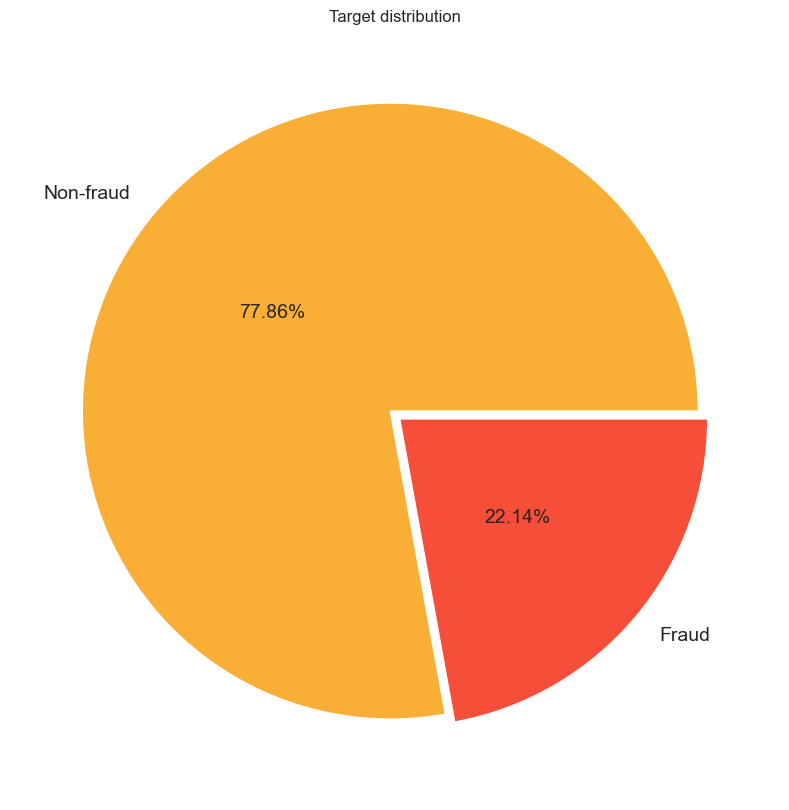

In [17]:
# Inspect target distribution
print(df['FLAG'].value_counts())

pie, ax = plt.subplots(figsize=[15,10])
labels = ['Non-fraud', 'Fraud']
colors = ['#f9ae35', '#f64e38']
plt.pie(x = df['FLAG'].value_counts(), autopct='%.2f%%', explode=[0.02]*2, labels=labels, pctdistance=0.5, textprops={'fontsize': 14}, colors = colors)
plt.title('Target distribution')
plt.show()

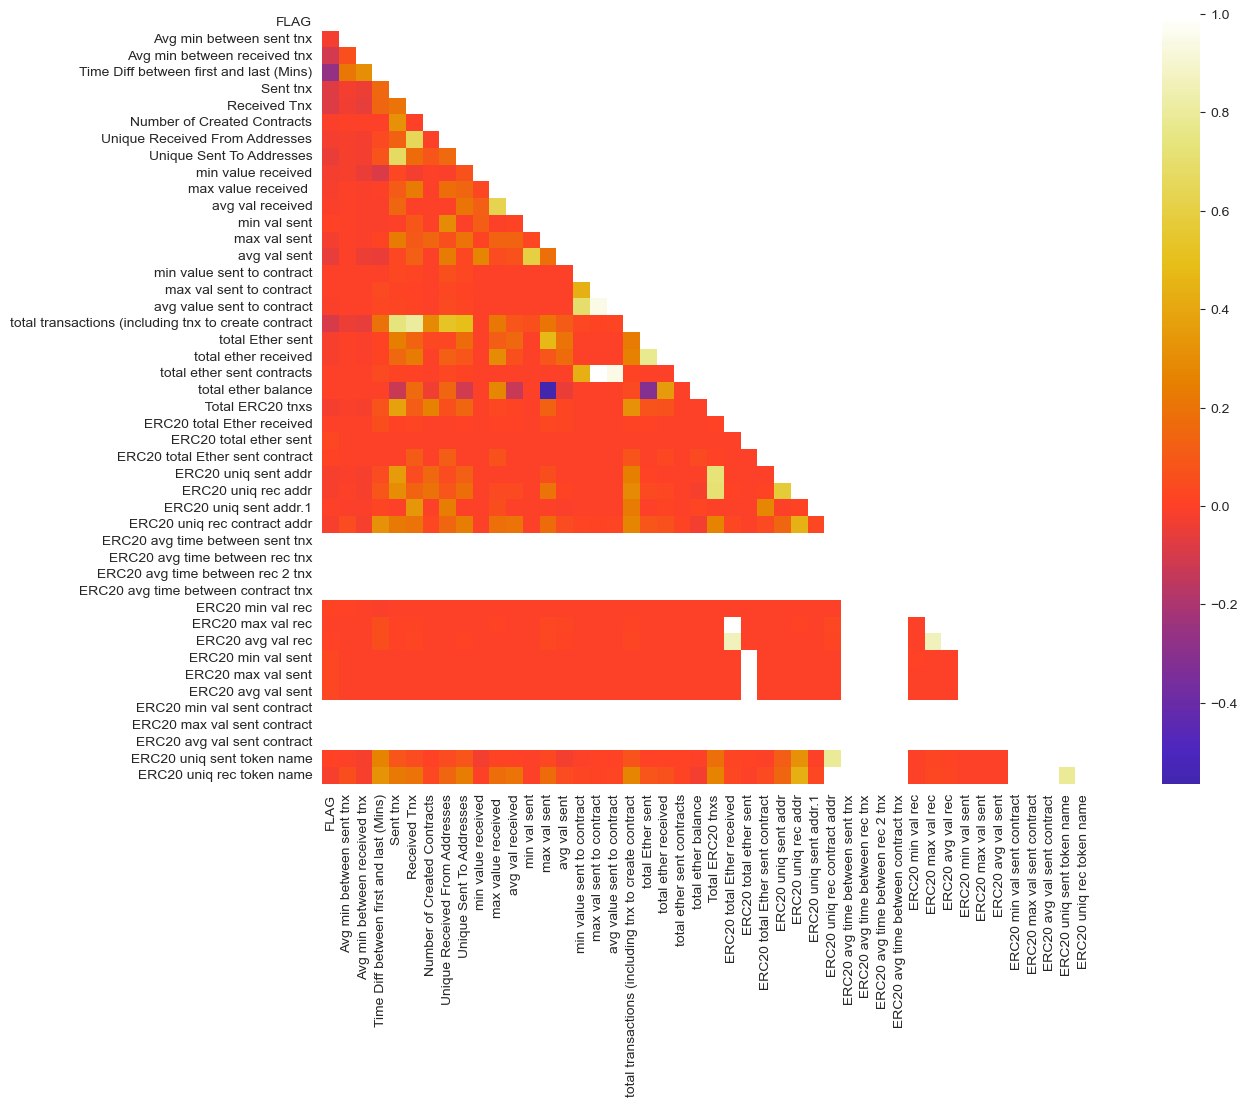

In [20]:
# Correlation matrix
corr = df.corr(numeric_only=True)

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='CMRmap', center=0, square=True)

# Data Cleaning

Check dataset imbalance, normal distributions, outliers and correlations of the between features are important because those can affect the performance of the model.

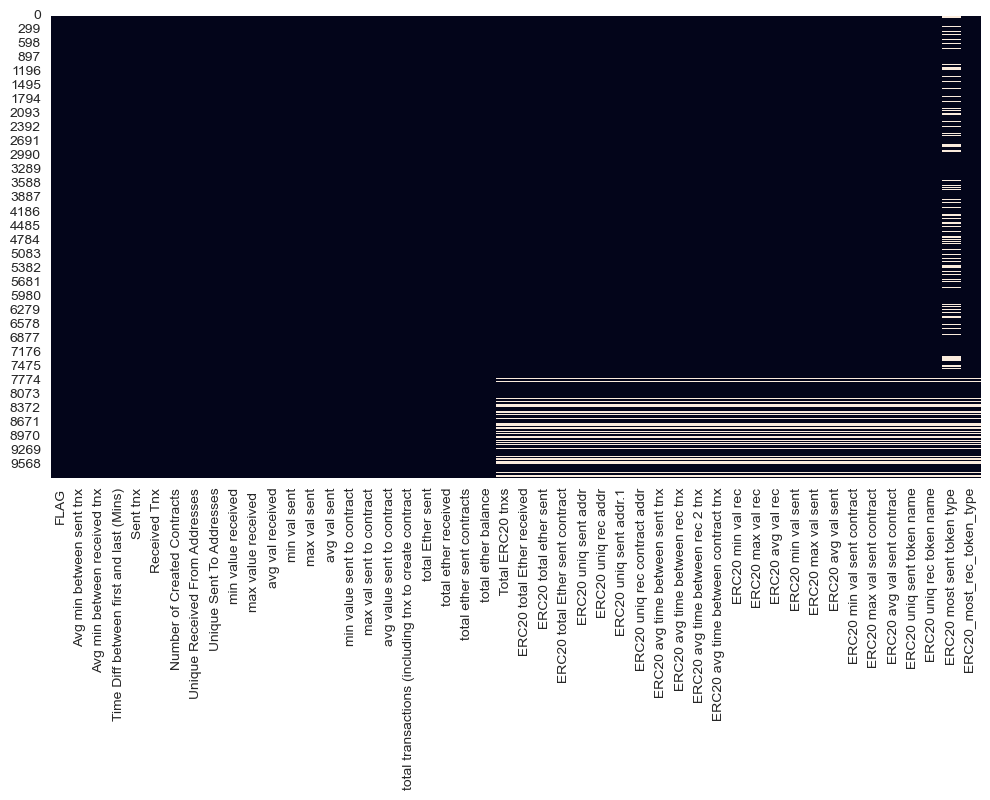

In [21]:
# Visualize missings pattern of the dataframe
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [22]:
# Drop the two categorical features
df.drop(df[categories], axis=1, inplace=True)

In [23]:
# Replace missings of numerical variables with median
df.fillna(df.median(), inplace=True)

(9841, 46)


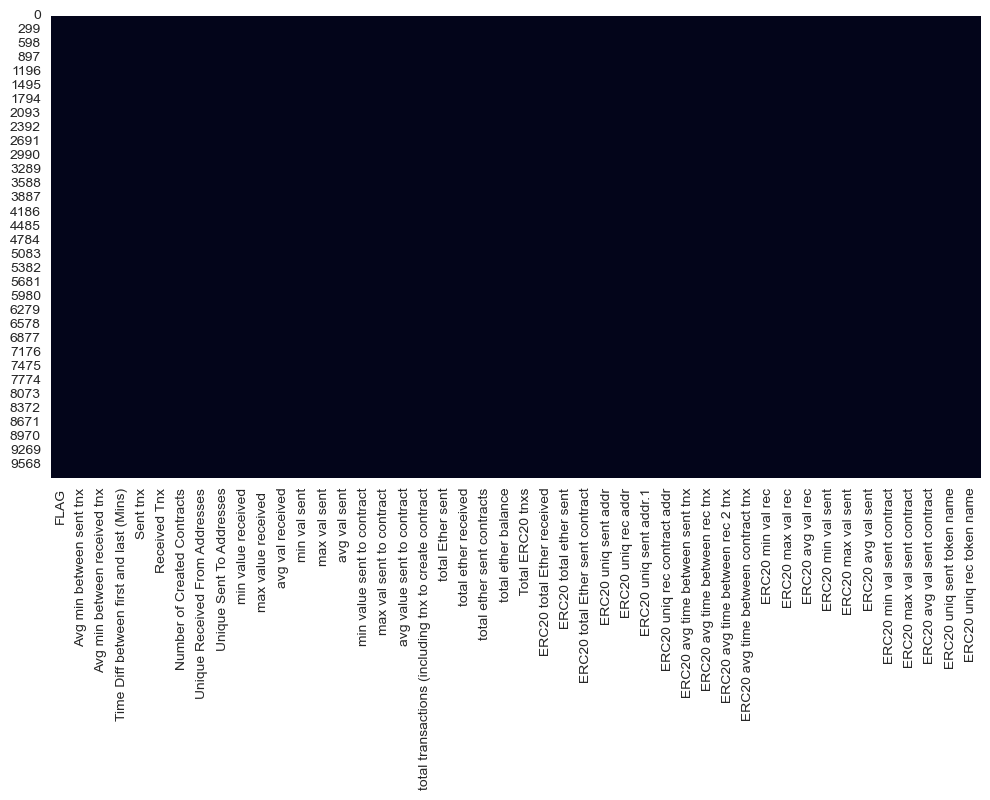

In [24]:
# Visualize missings pattern of the dataframe
print(df.shape)
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

Investigating the variance of the features, it was observed that there are some features with a variance = 0

In [25]:
# Filtering the features with 0 variance
no_var = df.var() == 0
print(df.var()[no_var])
print('\n')

# Drop features with 0 variance --- these features will not help in the performance of the model
df.drop(df.var()[no_var].index, axis = 1, inplace = True)
print(df.var())
print(df.shape)

 ERC20 avg time between sent tnx        0.0
 ERC20 avg time between rec tnx         0.0
 ERC20 avg time between rec 2 tnx       0.0
 ERC20 avg time between contract tnx    0.0
 ERC20 min val sent contract            0.0
 ERC20 max val sent contract            0.0
 ERC20 avg val sent contract            0.0
dtype: float64


FLAG                                                    1.724110e-01
Avg min between sent tnx                                4.616718e+08
Avg min between received tnx                            5.327656e+08
Time Diff between first and last (Mins)                 1.042889e+11
Sent tnx                                                5.733918e+05
Received Tnx                                            8.851734e+05
Number of Created Contracts                             2.000685e+04
Unique Received From Addresses                          8.917457e+04
Unique Sent To Addresses                                6.960121e+04
min value received                                    

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9841 entries, 0 to 9840
Data columns (total 39 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   FLAG                                                  9841 non-null   int64  
 1   Avg min between sent tnx                              9841 non-null   float64
 2   Avg min between received tnx                          9841 non-null   float64
 3   Time Diff between first and last (Mins)               9841 non-null   float64
 4   Sent tnx                                              9841 non-null   int64  
 5   Received Tnx                                          9841 non-null   int64  
 6   Number of Created Contracts                           9841 non-null   int64  
 7   Unique Received From Addresses                        9841 non-null   int64  
 8   Unique Sent To Addresses                              9841 non-

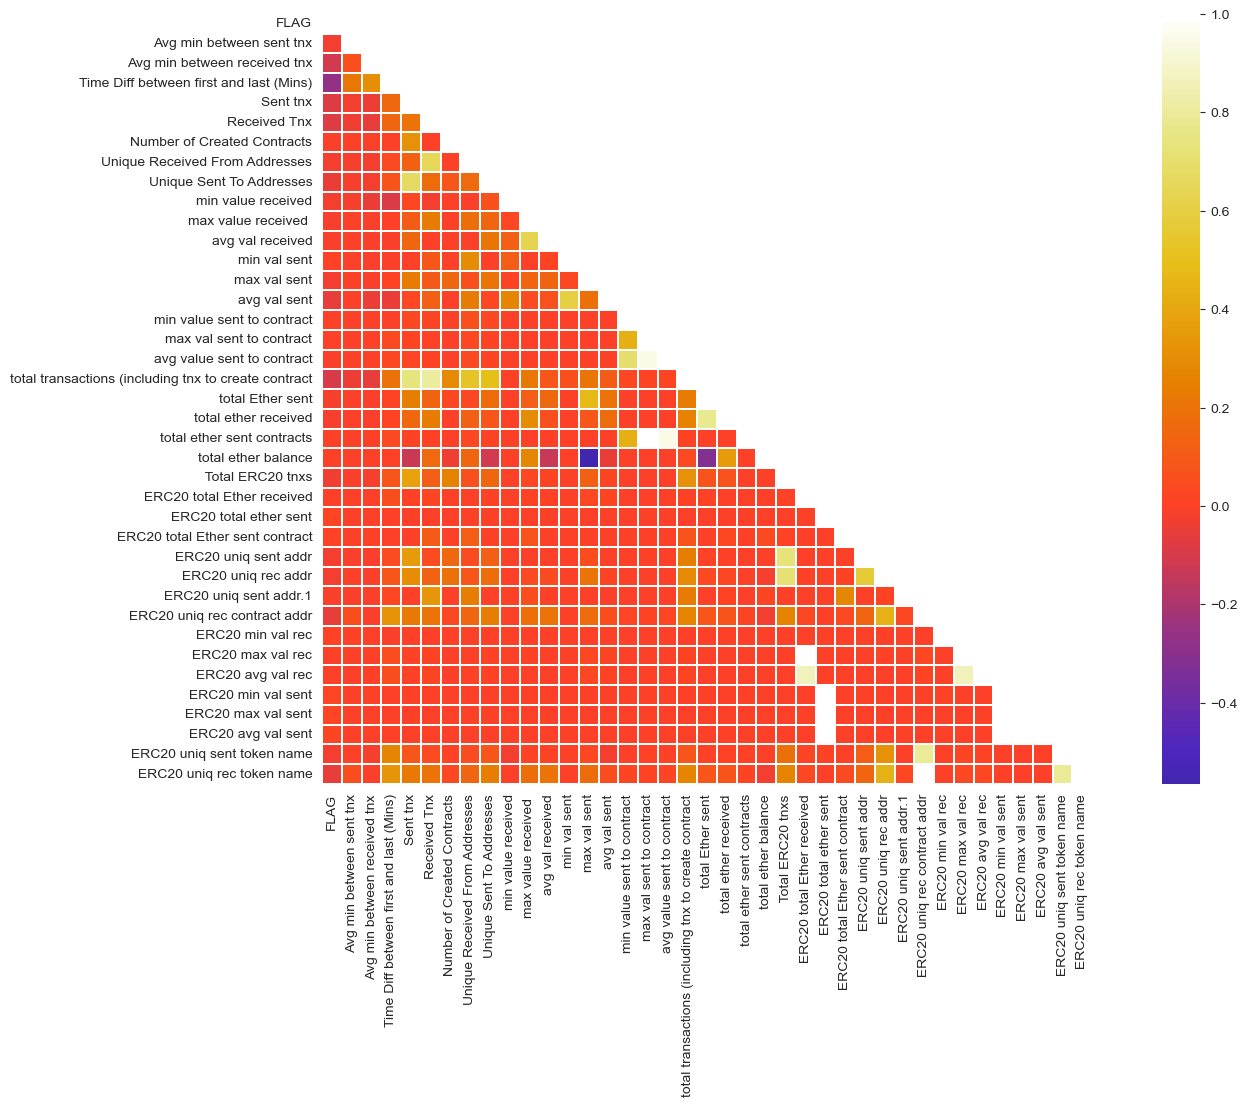

In [27]:
# Recheck the Correlation matrix
corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='CMRmap', center=0, linewidths=0.1, square=True)

In [28]:
drop = ['total transactions (including tnx to create contract', 'total ether sent contracts', 'max val sent to contract', ' ERC20 avg val rec',
        ' ERC20 avg val rec',' ERC20 max val rec', ' ERC20 min val rec', ' ERC20 uniq rec contract addr', 'max val sent', ' ERC20 avg val sent',
        ' ERC20 min val sent', ' ERC20 max val sent', ' Total ERC20 tnxs', 'avg value sent to contract', 'Unique Sent To Addresses',
        'Unique Received From Addresses', 'total ether received', ' ERC20 uniq sent token name', 'min value received', 'min val sent', ' ERC20 uniq rec addr' ]
df.drop(drop, axis=1, inplace=True)

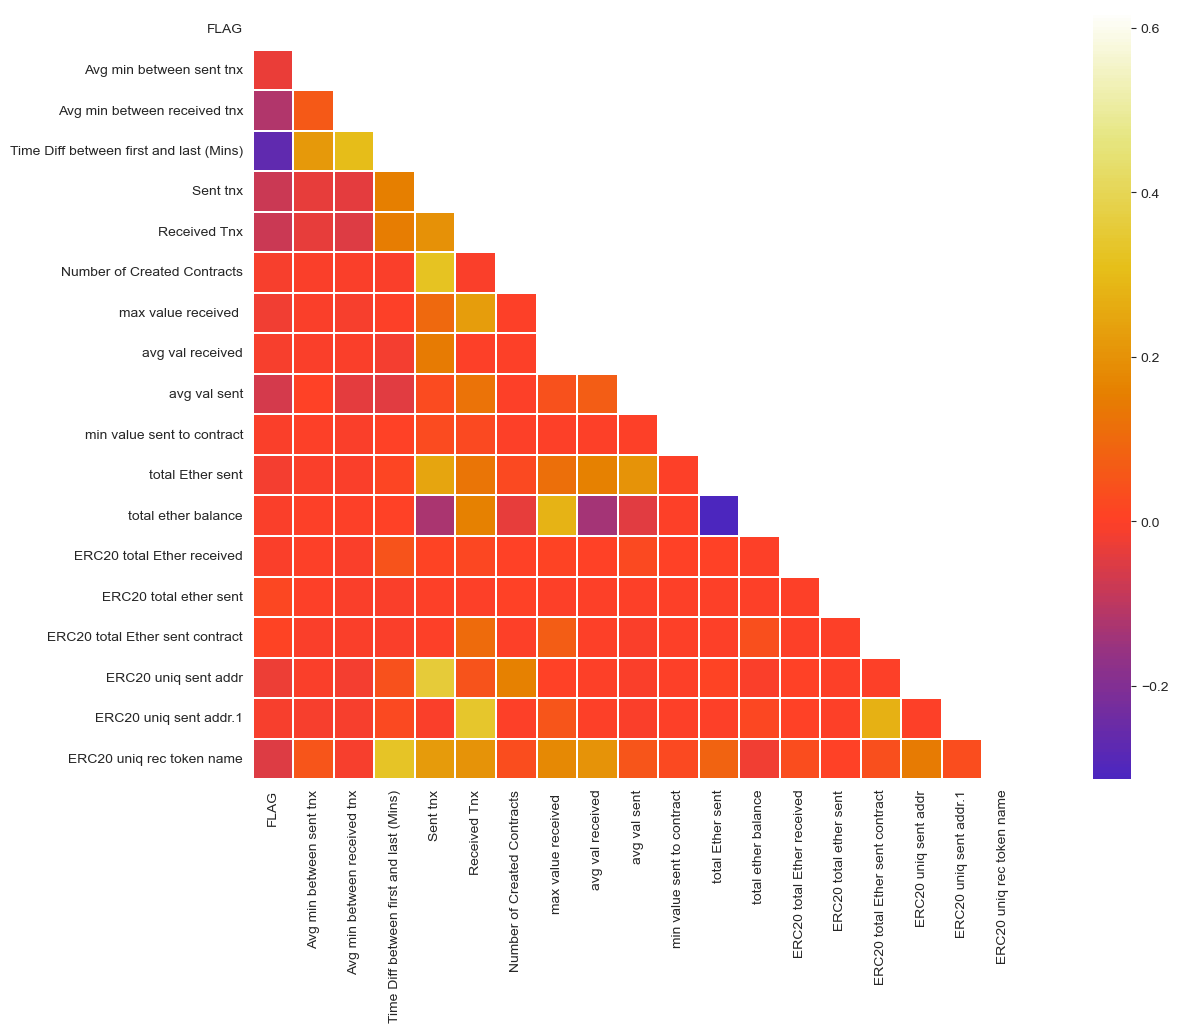

In [29]:
# Recheck the Correlation matrix
corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='CMRmap', center=0, linewidths=0.1, square=True)

In [30]:
columns = df.columns
columns

Index(['FLAG', 'Avg min between sent tnx', 'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'max value received ',
       'avg val received', 'avg val sent', 'min value sent to contract',
       'total Ether sent', 'total ether balance',
       ' ERC20 total Ether received', ' ERC20 total ether sent',
       ' ERC20 total Ether sent contract', ' ERC20 uniq sent addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec token name'],
      dtype='object')

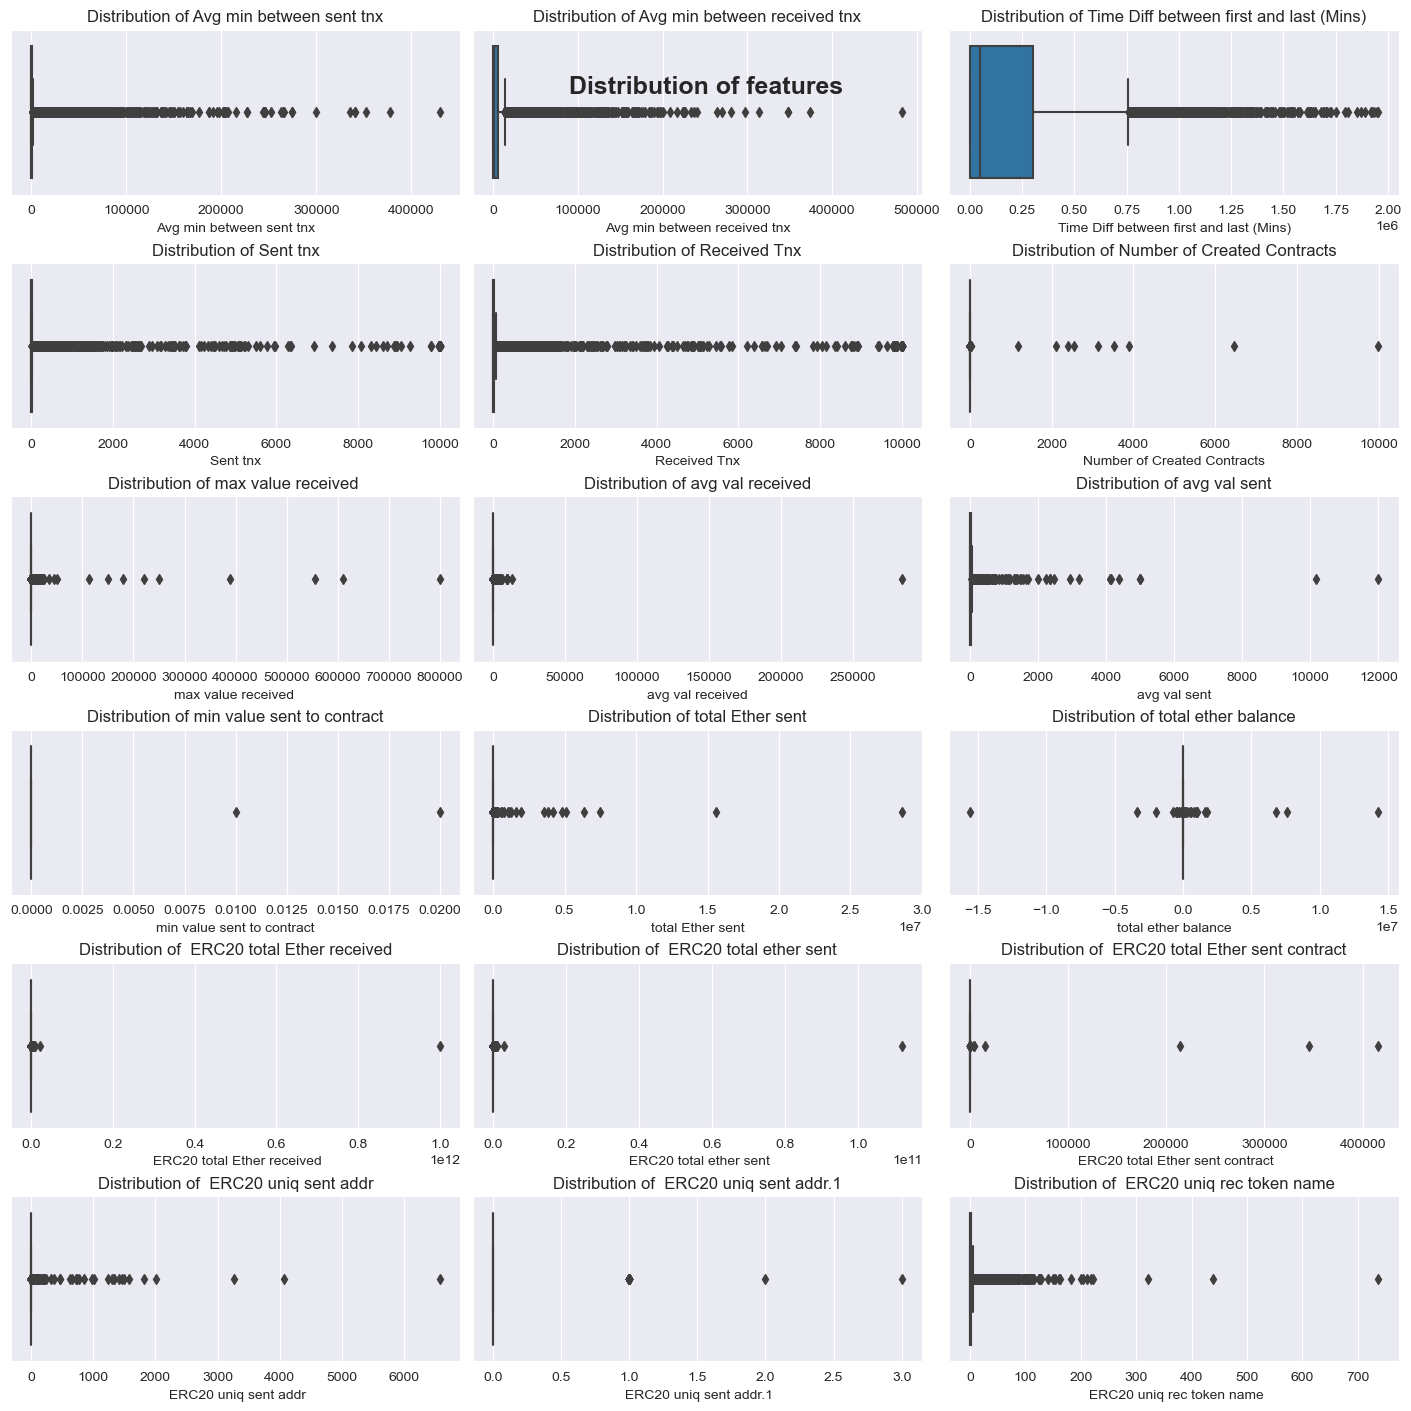

In [31]:
# Investigate the distribution of our features using boxplots
b=20

fig, axes = plt.subplots(6, 3, figsize=(14, 14), constrained_layout =True)
plt.subplots_adjust(wspace = 0.7, hspace=0.8)
plt.suptitle("Distribution of features",y=0.95, size=18, weight='bold')

ax = sns.boxplot(ax = axes[0,0], data=df, x=columns[1])
ax.set_title(f'Distribution of {columns[1]}')

ax1 = sns.boxplot(ax = axes[0,1], data=df, x=columns[2])
ax1.set_title(f'Distribution of {columns[2]}')

ax2 = sns.boxplot(ax = axes[0,2], data=df, x=columns[3])
ax2.set_title(f'Distribution of {columns[3]}')

ax3 = sns.boxplot(ax = axes[1,0], data=df, x=columns[4])
ax3.set_title(f'Distribution of {columns[4]}')

ax4 = sns.boxplot(ax = axes[1,1], data=df, x=columns[5])
ax4.set_title(f'Distribution of {columns[5]}')

ax5 = sns.boxplot(ax = axes[1,2], data=df, x=columns[6])
ax5.set_title(f'Distribution of {columns[6]}')

ax6 = sns.boxplot(ax = axes[2,0], data=df, x=columns[7])
ax6.set_title(f'Distribution of {columns[7]}')

ax7 = sns.boxplot(ax = axes[2,1], data=df, x=columns[8])
ax7.set_title(f'Distribution of {columns[8]}')

ax8 = sns.boxplot(ax = axes[2,2], data=df, x=columns[9])
ax8.set_title(f'Distribution of {columns[9]}')

ax9 = sns.boxplot(ax = axes[3,0], data=df, x=columns[10])
ax9.set_title(f'Distribution of {columns[10]}')
 
ax10 = sns.boxplot(ax = axes[3,1], data=df, x=columns[11])
ax10.set_title(f'Distribution of {columns[11]}')

ax11 = sns.boxplot(ax = axes[3,2], data=df, x=columns[12])
ax11.set_title(f'Distribution of {columns[12]}')
 
ax12 = sns.boxplot(ax = axes[4,0], data=df, x=columns[13])
ax12.set_title(f'Distribution of {columns[13]}')
 
ax13 = sns.boxplot(ax = axes[4,1], data=df, x=columns[14])
ax13.set_title(f'Distribution of {columns[14]}')
 
ax14 = sns.boxplot(ax = axes[4,2], data=df, x=columns[15])
ax14.set_title(f'Distribution of {columns[15]}')
 
ax15 = sns.boxplot(ax = axes[5,0], data=df, x=columns[16])
ax15.set_title(f'Distribution of {columns[16]}')
 
ax16 = sns.boxplot(ax = axes[5,1], data=df, x=columns[17])
ax16.set_title(f'Distribution of {columns[17]}')
 
ax17 = sns.boxplot(ax = axes[5,2], data=df, x=columns[18])
ax17.set_title(f'Distribution of {columns[18]}')

plt.show()

In [32]:
# Some features present a small distribution
for i in df.columns[1:]:
    if len(df[i].value_counts()) < 10:
        print(f'The column {i} has the following distribution: \n{df[i].value_counts()}')
        print('======================================')

The column min value sent to contract has the following distribution: 
min value sent to contract
0.00    9839
0.02       1
0.01       1
Name: count, dtype: int64
The column  ERC20 uniq sent addr.1 has the following distribution: 
 ERC20 uniq sent addr.1
0.0    9813
1.0      26
3.0       1
2.0       1
Name: count, dtype: int64


Based on the output, it can be observed that the values of these two variables are mosty 0s. Thus, both features will be discarded since they will not be helpful for our model

In [33]:
drops = ['min value sent to contract', ' ERC20 uniq sent addr.1']
df.drop(drops, axis=1, inplace=True)
print(df.shape)
df.head()

(9841, 17)


,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,max value received,avg val received,avg val sent,total Ether sent,total ether balance,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec token name
0,0,844.26,1093.71,704785.63,721,89,0,45.806785,6.589513,1.200681,865.691093,-279.224419,3.558854e+07,3.560317e+07,0.0,30.0,57.0
1,0,12709.07,2958.44,1218216.73,94,8,0,2.613269,0.385685,0.032844,3.087297,-0.001819,4.034283e+02,2.260809e+00,0.0,1.0,7.0
2,0,246194.54,2434.02,516729.30,2,10,0,1.165453,0.358906,1.794308,3.588616,0.000441,5.215121e+02,0.000000e+00,0.0,0.0,8.0
3,0,10219.60,15785.09,397555.90,25,9,0,500.000000,99.488840,70.001834,1750.045862,-854.646303,1.711105e+04,1.141223e+04,0.0,2.0,11.0
4,0,36.61,10707.77,382472.42,4598,20,1,12.802411,2.671095,0.022688,104.318883,-50.896986,1.628297e+05,1.235399e+05,0.0,4.0,27.0


# Model Preparation

Preprocess the data into training and validation datasets to be used for modelling of different algorithms.

In [34]:
y = df.iloc[:, 0]
X = df.iloc[:, 1:]
print(X.shape, y.shape)

(9841, 16) (9841,)


In [35]:
# Split into training (80%) and testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7872, 16) (7872,)
(1969, 16) (1969,)


In [36]:
# Normalize the training features
norm = PowerTransformer()
norm_train_f = norm.fit_transform(X_train)

In [37]:
# Transform test features
norm_test_f = norm.transform(X_test)

In [38]:
norm_df = pd.DataFrame(norm_train_f, columns=X_train.columns)
norm_df

,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,max value received,avg val received,avg val sent,total Ether sent,total ether balance,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec token name
0,1.294061,1.151313,1.393751,1.591951,1.017881,-0.401539,1.170696,0.988757,0.651223,1.416308,-0.007274,1.815951,2.508169,-0.038483,2.398649,1.831406
1,-1.096066,-1.184221,-1.638410,-1.391726,-1.785005,-0.401539,-1.407378,-1.283886,-1.138468,-1.252291,-0.006836,-0.746114,-0.410600,-0.038483,-0.437145,0.226082
2,-0.006354,0.213137,1.103220,1.970707,1.876994,-0.401539,0.613575,-0.995919,-0.869934,1.171479,-0.006819,-0.746114,-0.410600,-0.038483,-0.437145,-0.994019
3,-1.096066,1.220438,0.195684,-1.391726,-0.618856,2.490307,-0.871196,-0.822389,-1.138468,-1.252291,-0.006832,-0.746114,-0.410600,-0.038483,-0.437145,-0.994019
4,0.628503,-1.121221,-0.904665,-0.206187,-0.618856,-0.401539,0.889875,1.277099,1.332663,0.787323,-0.006836,-0.746114,-0.410600,-0.038483,-0.437145,-0.994019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7867,-1.096066,0.249518,-0.705997,-0.590325,-0.618856,-0.401539,-0.535113,-0.269750,0.183532,-0.463079,-0.006836,-0.746114,-0.410600,-0.038483,-0.437145,0.226082
7868,1.128623,0.633621,0.895636,0.707356,1.432439,-0.401539,0.339924,-0.354586,1.043745,1.010645,-0.006835,1.611838,-0.410600,-0.038483,-0.437145,1.238838
7869,-1.096066,-1.184221,-1.154101,-0.590325,-1.004903,-0.401539,-1.275895,-1.091970,-0.960939,-1.159157,-0.006835,-0.746114,-0.410600,-0.038483,-0.437145,-0.994019
7870,1.385084,0.988959,0.715180,0.707356,0.556810,-0.401539,1.858790,1.531808,1.671553,1.592460,-0.006835,1.514388,-0.410600,-0.038483,-0.437145,1.122262


findfont: Font family 'Sherif' not found.
findfont: Font family 'Sherif' not found.
findfont: Font family 'Sherif' not found.
findfont: Font family 'Sherif' not found.
findfont: Font family 'Sherif' not found.


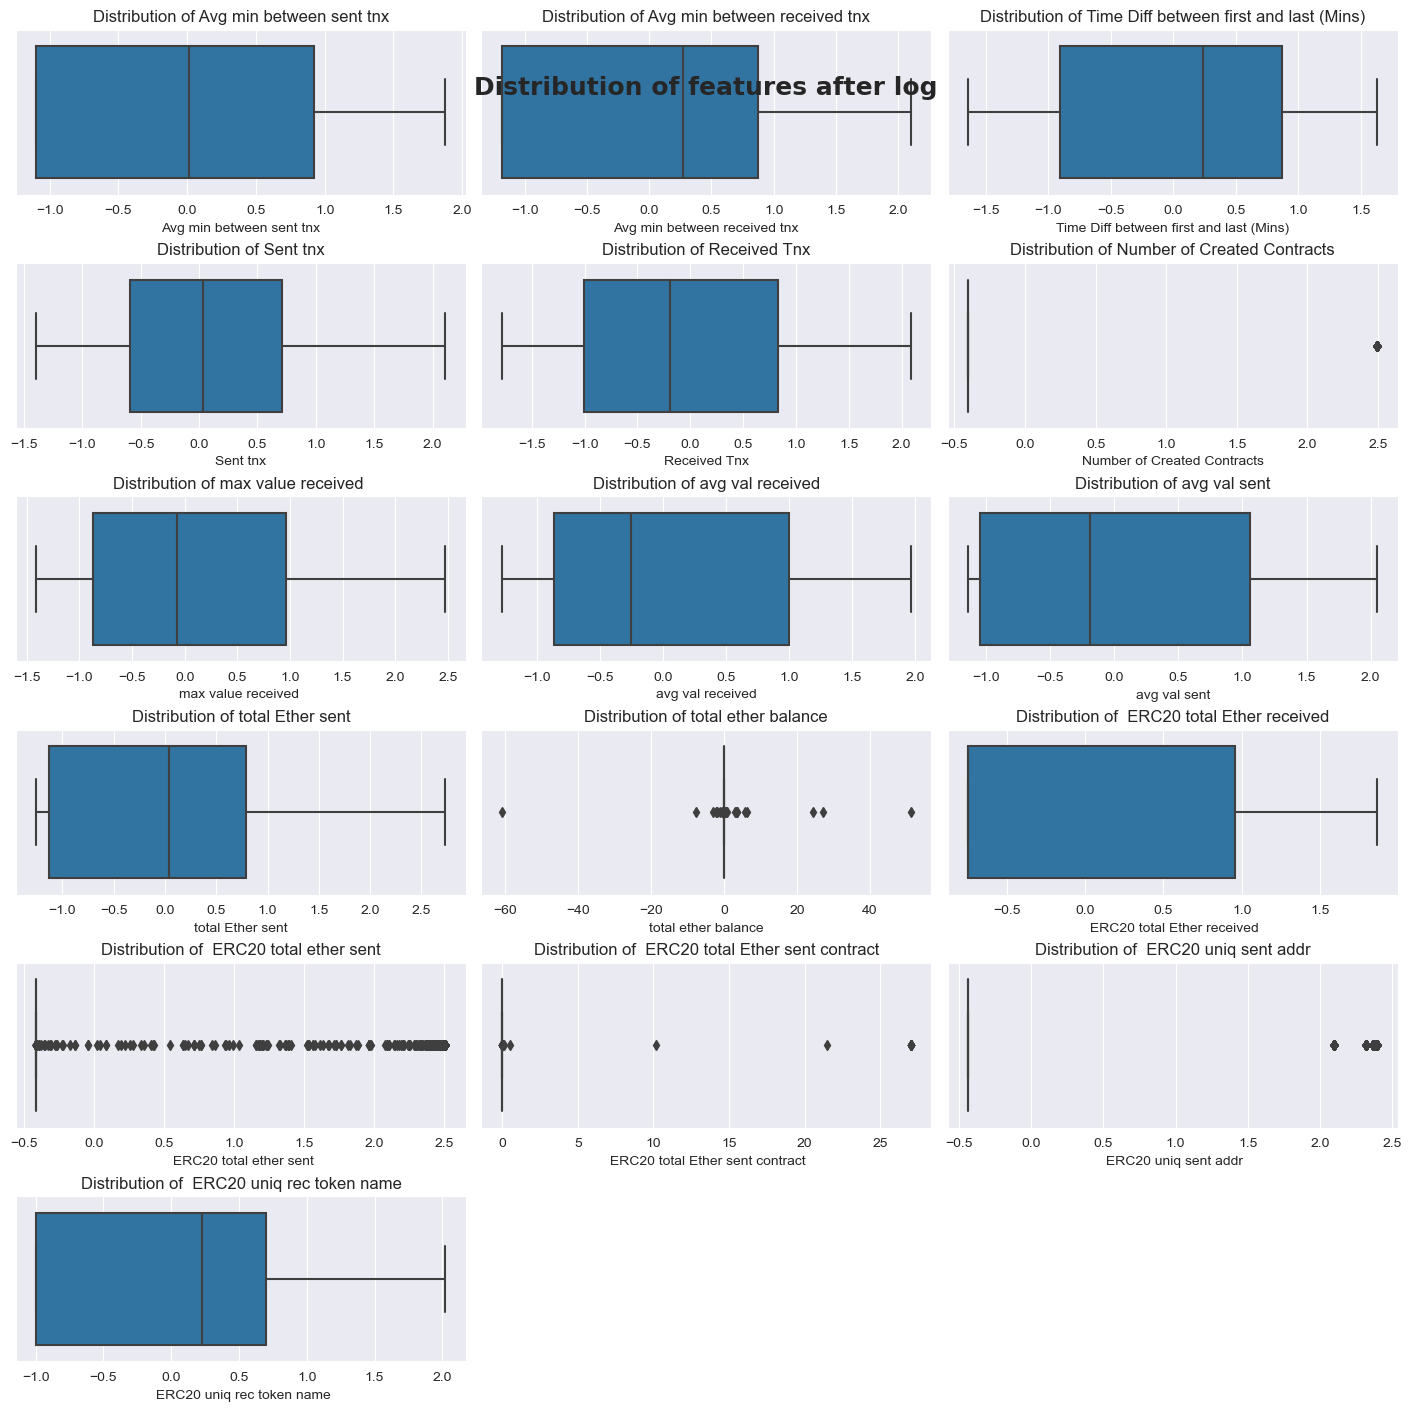

In [39]:
# Distribution of features after log transformation

b=20

fig, axes = plt.subplots(6, 3, figsize=(14, 14), constrained_layout =True)
plt.subplots_adjust(wspace = 0.7, hspace=0.8)
axes[-1, -1].axis('off') # hide axes
axes[-1, -2].axis('off') # hide axes
plt.suptitle("Distribution of features after log",y=0.95, family='Sherif', size=18, weight='bold')
 
ax = sns.boxplot(ax = axes[0,0], data=norm_df, x=norm_df.columns[0])
ax.set_title(f'Distribution of {norm_df.columns[0]}')
 
ax1 = sns.boxplot(ax = axes[0,1], data=norm_df, x=norm_df.columns[1])
ax1.set_title(f'Distribution of {norm_df.columns[1]}')
 
ax2 = sns.boxplot(ax = axes[0,2], data=norm_df, x=norm_df.columns[2])
ax2.set_title(f'Distribution of {norm_df.columns[2]}')
 
ax3 = sns.boxplot(ax = axes[1,0], data=norm_df, x=norm_df.columns[3])
ax3.set_title(f'Distribution of {norm_df.columns[3]}')
 
ax4 = sns.boxplot(ax = axes[1,1], data=norm_df, x=norm_df.columns[4])
ax4.set_title(f'Distribution of {norm_df.columns[4]}')
 
ax5 = sns.boxplot(ax = axes[1,2], data=norm_df, x=norm_df.columns[5])
ax5.set_title(f'Distribution of {norm_df.columns[5]}')
 
ax6 = sns.boxplot(ax = axes[2,0], data=norm_df, x=norm_df.columns[6])
ax6.set_title(f'Distribution of {norm_df.columns[6]}')
 
ax7 = sns.boxplot(ax = axes[2,1], data=norm_df, x=norm_df.columns[7])
ax7.set_title(f'Distribution of {norm_df.columns[7]}')
 
ax8 = sns.boxplot(ax = axes[2,2], data=norm_df, x=norm_df.columns[8])
ax8.set_title(f'Distribution of {norm_df.columns[8]}')
 
ax9 = sns.boxplot(ax = axes[3,0], data=norm_df, x=norm_df.columns[9])
ax9.set_title(f'Distribution of {norm_df.columns[9]}')

ax10 = sns.boxplot(ax = axes[3,1], data=norm_df, x=norm_df.columns[10])
ax10.set_title(f'Distribution of {norm_df.columns[10]}')
 
ax11 = sns.boxplot(ax = axes[3,2], data=norm_df, x=norm_df.columns[11])
ax11.set_title(f'Distribution of {norm_df.columns[11]}')
 
ax12 = sns.boxplot(ax = axes[4,0], data=norm_df, x=norm_df.columns[12])
ax12.set_title(f'Distribution of {norm_df.columns[12]}')
 
ax13 = sns.boxplot(ax = axes[4,1], data=norm_df, x=norm_df.columns[13])
ax13.set_title(f'Distribution of {norm_df.columns[13]}')
 
ax14 = sns.boxplot(ax = axes[4,2], data=norm_df, x=norm_df.columns[14])
ax14.set_title(f'Distribution of {norm_df.columns[14]}')
 
ax15 = sns.boxplot(ax = axes[5,0], data=norm_df, x=norm_df.columns[15])
ax15.set_title(f'Distribution of {norm_df.columns[15]}')

plt.show()

## Data Imbalance

In [40]:
oversample = SMOTE()
print(f'Shape of the training before SMOTE: {norm_train_f.shape, y_train.shape}')

x_tr_resample, y_tr_resample = oversample.fit_resample(norm_train_f, y_train)
print(f'Shape of the training after SMOTE: {x_tr_resample.shape, y_tr_resample.shape}')

Shape of the training before SMOTE: ((7872, 16), (7872,))
Shape of the training after SMOTE: ((12230, 16), (12230,))


In [41]:
# Target distribution before SMOTE
non_fraud = 0
fraud = 0

for i in y_train:
    if i == 0:
        non_fraud +=1
    else:
        fraud +=1

# Target distribution after SMOTE
no = 0
yes = 1

for j in y_tr_resample:
    if j == 0:
        no +=1
    else:
        yes +=1


print(f'BEFORE OVERSAMPLING \n \tNon-frauds: {non_fraud} \n \tFrauds: {fraud}')
print(f'AFTER OVERSAMPLING \n \tNon-frauds: {no} \n \tFrauds: {yes}')

BEFORE OVERSAMPLING 
 	Non-frauds: 6115 
 	Frauds: 1757
AFTER OVERSAMPLING 
 	Non-frauds: 6115 
 	Frauds: 6116


# Data Modelling

## Logistic Regression

In [42]:
LR = LogisticRegression(random_state=42)
LR.fit(x_tr_resample, y_tr_resample)

preds = LR.predict(norm_test_f)

In [43]:
print(y_test.shape)
y_test.value_counts()

(1969,)


FLAG
0    1547
1     422
Name: count, dtype: int64

              precision    recall  f1-score   support

           0       0.97      0.89      0.92      1547
           1       0.68      0.88      0.77       422

    accuracy                           0.89      1969
   macro avg       0.82      0.89      0.85      1969
weighted avg       0.90      0.89      0.89      1969

[[1372  175]
 [  49  373]]


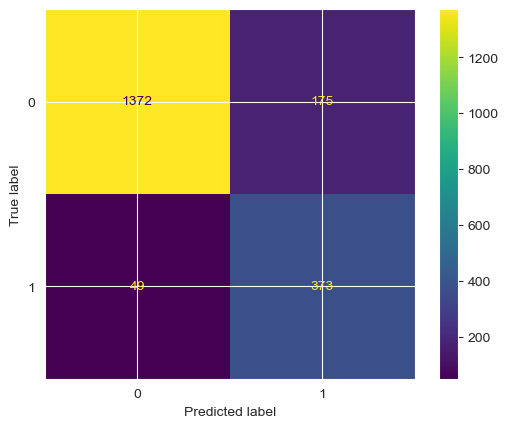

In [44]:
print(classification_report(y_test, preds))

# create the confusion matrix
cm = confusion_matrix(y_test, preds)
print(cm)

# create the display object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR.classes_)

# plot the confusion matrix
disp.plot()

Considering the confusion matrix:
 - LR model, correctly identified 373 (TP) of FRAUD cases, out of 422 (P).
 - LR model flagged as FRAUD 171 (FP) out of 1547, when this cases were actually NON-FRAUD
 

Dealing with a fraud detection scenario, we care more about the transactions that were actualy FRAUDS, but which were treated as NON-FRAUD by our model (FN - 49) TYPE II ERROR

Thereby, let's try to increase the recall using other methods.


## Random Forest

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1547
           1       0.94      0.95      0.94       422

    accuracy                           0.98      1969
   macro avg       0.96      0.97      0.96      1969
weighted avg       0.98      0.98      0.98      1969

[[1520   27]
 [  22  400]]


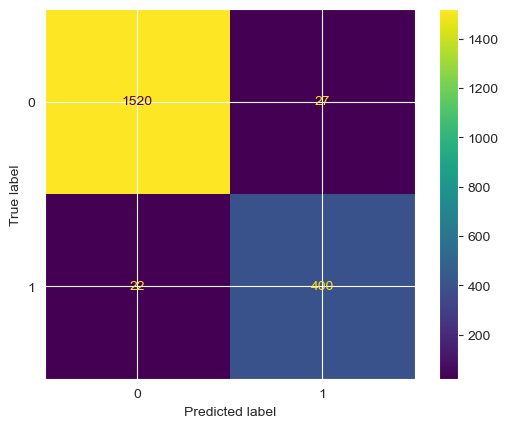

In [45]:
RF = RandomForestClassifier(random_state=42)
RF.fit(x_tr_resample, y_tr_resample)
preds_RF = RF.predict(norm_test_f)

print(classification_report(y_test, preds_RF))

# create the confusion matrix
cm = confusion_matrix(y_test, preds_RF)
print(cm)

# create the display object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR.classes_)

# plot the confusion matrix
disp.plot()

The RF classifier seems to produce more efective results
 - Both FP and FN are reduced considerably increasing the recall & precision
 - Using RF, the model fails to detect 20 FRAUD cases. 


Let's see if we can increase these results.

## XGBClassifier (XGBoost)

XGBClassifier is a class in scikit-learn that provides an API for the XGBoost algorithm.

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1547
           1       0.95      0.96      0.96       422

    accuracy                           0.98      1969
   macro avg       0.97      0.97      0.97      1969
weighted avg       0.98      0.98      0.98      1969

[[1525   22]
 [  16  406]]


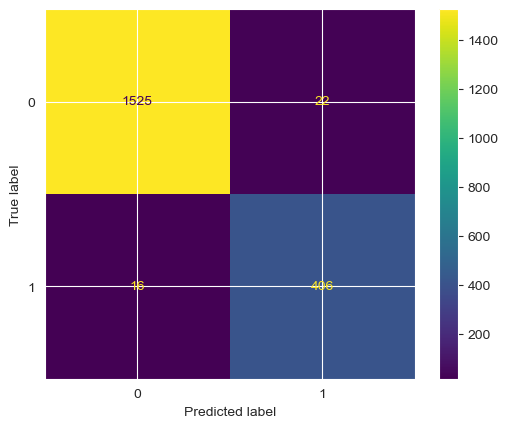

In [46]:
xgb_c = xgb.XGBClassifier(random_state=42)
xgb_c.fit(x_tr_resample, y_tr_resample)
preds_xgb = xgb_c.predict(norm_test_f)

print(classification_report(y_test, preds_xgb))

# create the confusion matrix
cm = confusion_matrix(y_test, preds_xgb)
print(cm)

# create the display object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR.classes_)

# plot the confusion matrix
disp.plot()

## XGB Classifier with Hyperparameters

In [47]:
params_grid = {'learning_rate':[0.01, 0.1, 0.5],
              'n_estimators':[100,200],
              'subsample':[0.3, 0.5, 0.9],
               'max_depth':[2,3,4],
               'colsample_bytree':[0.3,0.5,0.7]}

grid = GridSearchCV(estimator=xgb_c, param_grid=params_grid, scoring='recall', cv = 10, verbose = 0)

grid.fit(x_tr_resample, y_tr_resample)
print(f'Best params found for XGBoost are: {grid.best_params_}')
print(f'Best recall obtained by the best params: {grid.best_score_}')

KeyboardInterrupt: 

In [ ]:
preds_best_xgb = grid.best_estimator_.predict(norm_test_f)

print(classification_report(y_test, preds_best_xgb))

# create the confusion matrix
cm = confusion_matrix(y_test, preds_best_xgb)
print(cm)

# create the display object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR.classes_)

# plot the confusion matrix
disp.plot()


Based on the above outputs, the confusion matrix shows no improvement, the results are very similar with those obtained by the untuned model.

In [ ]:
# Plotting AUC for untuned XGB Classifier
probs = xgb_c.predict_proba(norm_test_f)
pred = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12,8))
plt.title('ROC for tuned XGB Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Deep Neural Network (DNN)

### Visualizations

Make some visualizations for displaying the results based on previous module tutorials.

* Loss and Accuracy Plot: A line plot that has 2 lines that shows the training of the modelling process.
* Confusion Matrix: A table used to evaluate the performance of a classification model. It shows the number of true positives, false positives, true negatives, and false negatives. You can use the scikit-learn library to calculate and plot the confusion matrix.
* ROC (Receiver Operating Characteristic) Curve: A plot that shows the performance of a binary classifier as the discrimination threshold is varied. You can use the scikit-learn library to calculate the ROC curve and plot it using matplotlib.
* Precision-Recall Curve: A plot of the precision (positive predictive value) versus the recall (sensitivity) for different threshold values. You can use the scikit-learn library to calculate the precision-recall curve and plot it using matplotlib.


In [ ]:
def show_model_performance(norm_test_f, y_test, model):
  # Evaluate the model
  lost, accuracy = model.evaluate(norm_test_f, y_test, verbose=0)
  print('Loss:', lost)
  print('Accuracy:', accuracy)

def show_loss_and_accuracy_line_plot(history):
  # Plot the loss and accuracy over epochs
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

def show_confusion_matrix(y_test, model, y_pred_binary):
  print(classification_report(y_test, y_pred_binary))
  # create the confusion matrix
  cm = confusion_matrix(y_test, y_pred_binary)
  print(cm)

  # create the display object
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)

  # plot the confusion matrix
  disp.plot()

def show_roc_curve_plot(y_test, y_pred):
  # Compute ROC curve and ROC area for each class
  fpr, tpr, _ = roc_curve(y_test, y_pred)
  roc_auc = auc(fpr, tpr)

  # Plot ROC curve
  plt.figure(figsize=(8, 6))
  plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc="lower right")
  plt.show()

def show_precision_recall_curve_plot(y_test, y_pred):
  # Compute Precision-Recall curve and average precision for each class
  precision, recall, _ = precision_recall_curve(y_test, y_pred)
  average_precision = average_precision_score(y_test, y_pred)

  # Plot Precision-Recall curve
  plt.figure(figsize=(8, 6))
  plt.step(recall, precision, color='b', alpha=0.2, where='post')
  plt.fill_between(recall, precision, alpha=0.2, color='b')
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.ylim([0.0, 1.05])
  plt.xlim([0.0, 1.0])
  plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
  plt.show()

## Model 1

In [ ]:
# Number of neurons. No harm in changing the numbers, no guidelines here.
L1 = 64 # First hidden layer neurons
L2 = 32 # Second hidden layer neurons


# Activation functions
activation_function = 'relu'
activation_function2 = 'relu'
output_activation_function = 'sigmoid' # Multi-class = softmax, Binary = sigmoid, continuous = linear

# Number of outputs
# You need to know your columns, for example, you only prdicting the value is_malicious, so here only one value.
no_of_output = 1

# Initialize object
model = Sequential()

# First hidden layer
model.add(Dense(L1, input_dim=x_tr_resample.shape[1], activation=activation_function))

# Hidden layer
model.add(Dense(L2, activation=activation_function2))

# Output layer
model.add(Dense(no_of_output,activation=output_activation_function))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(x_tr_resample, y_tr_resample, validation_split=0.2, epochs=24, batch_size=128, verbose=1)

y_pred = model.predict(norm_test_f)

# Convert predicted probabilities to binary predictions
y_pred_binary = np.where(y_pred > 0.5, 1, 0)

show_model_performance(norm_test_f, y_test, model)
show_loss_and_accuracy_line_plot(history)
show_confusion_matrix(y_test, model, y_pred_binary)
show_roc_curve_plot(y_test, y_pred_binary)
show_precision_recall_curve_plot(y_test, y_pred_binary)

## DNN Model 2

* Added another Hidden Layer and Dropout Layer.
* Increased the number of neurons in current layers.
* Additionally, added early stopping to prevent overtraining.

In [ ]:
# Number of neurons. No harm in changing the numbers, no guidelines here.
L1 = 128 # First hidden layer neurons
L2 = 64 # Second hidden layer neurons
L3 = 32 # Third hidden layer neurons

# Activation functions
activation_function = 'relu'
activation_function2 = 'relu'
activation_function3 = 'relu'
output_activation_function = 'sigmoid' # Multi-class = softmax, Binary = sigmoid, continuous = linear

# Number of outputs
# You need to know your columns, for example, you only prdicting the value is_malicious, so here only one value.
no_of_output = 1

# Initialize object
model = Sequential()

# First hidden layer
model.add(Dense(L1, input_dim=x_tr_resample.shape[1], activation=activation_function))

# Dropout Layer
model.add(Dropout(0.3))

# Hidden layer
model.add(Dense(L2, activation=activation_function2))

# Dropout Layer
model.add(Dropout(0.3))

# Hidden layer
model.add(Dense(L3, activation=activation_function3))

# Dropout Layer
model.add(Dropout(0.3))

# Output layer
model.add(Dense(no_of_output,activation=output_activation_function,kernel_regularizer=regularizers.l2(0.01)))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model
history = model.fit(x_tr_resample, y_tr_resample, validation_split=0.2, epochs=24, batch_size=128, verbose=1, callbacks=[early_stopping])

# Make predictions
y_pred = model.predict(norm_test_f)

# Convert predicted probabilities to binary predictions
y_pred_binary = np.where(y_pred > 0.5, 1, 0)

show_model_performance(norm_test_f, y_test, model)
show_loss_and_accuracy_line_plot(history)
show_confusion_matrix(y_test, model, y_pred_binary)
show_roc_curve_plot(y_test, y_pred_binary)
show_precision_recall_curve_plot(y_test, y_pred_binary)

## DNN Model 3

* Added neurons of each layer to 256, 128 and 64 respectively.
* Added Kernel Initializer GlorotNormal.

In [ ]:
# Number of neurons. No harm in changing the numbers, no guidelines here.
L1 = 256 # First hidden layer neurons
L2 = 128 # Second hidden layer neurons
L3 = 64 # Third hidden layer neurons

# Activation functions
activation_function = 'relu'
activation_function2 = 'relu'
activation_function3 = 'relu'
output_activation_function = 'sigmoid' # Multi-class = softmax, Binary = sigmoid, continuous = linear

# Number of outputs
# You need to know your columns, for example, you only prdicting the value is_malicious, so here only one value.
no_of_output = 1

# Initialize object
model = Sequential()

# First hidden layer
model.add(Dense(L1, input_dim=x_tr_resample.shape[1], activation=activation_function))

# Dropout Layer
model.add(Dropout(0.3))

# Hidden layer
model.add(Dense(L2, activation=activation_function2))

# Dropout Layer
model.add(Dropout(0.3))

# Hidden layer
model.add(Dense(L3, activation=activation_function3, kernel_initializer=initializers.GlorotNormal(seed=None), kernel_regularizer=regularizers.l2(0.01)))

# Dropout Layer
model.add(Dropout(0.3))

# Output layer
model.add(Dense(no_of_output,activation=output_activation_function,kernel_regularizer=regularizers.l2(0.01)))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model
history = model.fit(x_tr_resample, y_tr_resample, validation_split=0.2, epochs=24, batch_size=128, verbose=1, callbacks=[early_stopping])

# Make predictions
y_pred = model.predict(norm_test_f)

# Convert predicted probabilities to binary predictions
y_pred_binary = np.where(y_pred > 0.5, 1, 0)

show_model_performance(norm_test_f, y_test, model)
show_loss_and_accuracy_line_plot(history)
show_confusion_matrix(y_test, model, y_pred_binary)
show_roc_curve_plot(y_test, y_pred_binary)
show_precision_recall_curve_plot(y_test, y_pred_binary)

# DNN Model 4
Adding even more neurons, layers with initializers and regularizers to each layer. Additionally, tried not to remove outlier by z-score and IQR to check whether remove outliers or 'noises' is the root cause of overfitting. Increase the learning rate (0.001, 0.01) on each layer. Increse Dropout rate (0.3)

In [ ]:
# Number of neurons. No harm in changing the numbers, no guidelines here.
L1 = 1024 # First hidden layer neurons
L2 = 512 # Second hidden layer neurons
L3 = 256 # Third hidden layer neurons
L4 = 128 # Fourth hidden layer neurons
L5 = 64  # Fifth hidden layer neurons

# Activation functions
activation_function = 'relu'
activation_function2 = 'relu'
activation_function3 = 'relu'
output_activation_function = 'sigmoid' # Multi-class = softmax, Binary = sigmoid, continuous = linear

# Number of outputs
# You need to know your columns, for example, you only prdicting the value is_malicious, so here only one value.
no_of_output = 1

# Initialize object
model = Sequential()

# First hidden layer
model.add(Dense(L1, input_dim=x_tr_resample.shape[1], activation=activation_function, kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None), kernel_regularizer=regularizers.l2(0.01)))

# Dropout Layer
model.add(Dropout(0.3))

# Hidden layer
model.add(Dense(L2, activation=activation_function2, kernel_initializer=initializers.GlorotNormal(seed=None), kernel_regularizer=regularizers.l2(0.01)))

# Dropout Layer
model.add(Dropout(0.3))

# Hidden layer
model.add(Dense(L3, activation=activation_function3, kernel_initializer=initializers.GlorotNormal(seed=None), kernel_regularizer=regularizers.l2(0.01)))

# Dropout Layer
model.add(Dropout(0.3))

# Hidden layer
model.add(Dense(L4, activation=activation_function3, kernel_initializer=initializers.GlorotNormal(seed=None), kernel_regularizer=regularizers.l2(0.01)))

# Dropout Layer
model.add(Dropout(0.3))

# Hidden layer
model.add(Dense(L5, activation=activation_function3, kernel_initializer=initializers.GlorotNormal(seed=None), kernel_regularizer=regularizers.l2(0.01)))

# Dropout Layer
model.add(Dropout(0.3))

# Output layer
model.add(Dense(no_of_output, activation=output_activation_function, kernel_initializer=initializers.GlorotNormal(seed=None), kernel_regularizer=regularizers.l2(0.01)))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model
history = model.fit(x_tr_resample, y_tr_resample, validation_split=0.2, epochs=24, batch_size=128, verbose=1, callbacks=[early_stopping])

# Make predictions
y_pred = model.predict(norm_test_f)

# Convert predicted probabilities to binary predictions
y_pred_binary = np.where(y_pred > 0.5, 1, 0)

show_model_performance(norm_test_f, y_test, model)
show_loss_and_accuracy_line_plot(history)
show_confusion_matrix(y_test, model, y_pred_binary)
show_roc_curve_plot(y_test, y_pred_binary)
show_precision_recall_curve_plot(y_test, y_pred_binary)

# DNN Model 5 (Hyperparameters)

Introduce DNN Grid Search Hyperparameter.

There are several reasons why Grid Search Hyperparameters are introduced:

* Automation: Manually tuning hyperparameters can be a time-consuming and error-prone process. Grid Search Hyperparameters automates this process and finds the best combination of hyperparameters to improve the model's performance.

* Performance improvement: Hyperparameters have a significant impact on a model's performance. Grid Search Hyperparameters can help in selecting the best combination of hyperparameters that can lead to improved performance.

* Generalization: Hyperparameters that are optimized for a specific dataset may not work well on other datasets. Grid Search Hyperparameters can help in finding the optimal hyperparameters that work well on different datasets.

* Efficiency: Grid Search Hyperparameters is an efficient approach to finding the best hyperparameters, as it systematically explores all possible combinations of hyperparameters.

GridSearchCV function tries to intelligently speed up the hyperparameter search process by removing the other possibilities when tuning hyperparameters. It uses a technique called "grid search" to exhaustively search through all the possible combinations of hyperparameters, but it uses a smart approach to search only through the combinations that are likely to be useful.

It does this by performing a cross-validation on each combination of hyperparameters and only selecting those combinations that perform the best. It then continues the search using these combinations until it finds the best hyperparameters.

However, despite its intelligent search approach, GridSearchCV can still be computationally expensive, especially when the search space is large. It is important to carefully choose the hyperparameters to search and limit the search space to avoid unnecessary computations.

Have dropout rate to disable dropout layer to test possibilities.

In [ ]:
# Function to create model with given parameters
def create_model(optimizer='adam', activation='relu', loss='binary_crossentropy', metrics=['accuracy'], 
                 L1=1024, L2=512, L3=256, L4=128, L5=64, dropout_rate=0.3, learning_rate=0.1):
    model = Sequential()
    model.add(Dense(L1, input_dim=x_tr_resample.shape[1], activation=activation, kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(L2, activation=activation, kernel_initializer=initializers.GlorotNormal(seed=None)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(L3, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(L4, activation=activation, kernel_initializer=initializers.GlorotNormal(seed=None), kernel_regularizer=regularizers.l2(learning_rate)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(L5, activation=activation, kernel_initializer=initializers.GlorotNormal(seed=None), kernel_regularizer=regularizers.l2(learning_rate)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(no_of_output, activation='sigmoid'))
    model.compile(loss=loss, optimizer=optimizer, metrics=metrics)
    return model

In [ ]:
print('y.shape:\n\n\n', y.shape)
print('X.shape:\n\n\n', X.shape)
print('x_tr_resample.shape:\n\n\n', x_tr_resample.shape)
print('y_tr_resample.shape:\n\n\n', y_tr_resample.shape)

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Create KerasClassifier object for GridSearchCV
model = KerasClassifier(build_fn=create_model, verbose=1)

# Define grid search parameters
optimizers = ['adam'] # 'rmsprop', 
activations = ['relu']
losses = ['binary_crossentropy'] # , 'mean_squared_error'
metrics = ['accuracy'] # , ['precision', 'recall']
epochs = [48]
batches = [128]
l1 = [1024]
l2 = [512]
l3 = [256]
l4 = [128]
l5 = [64]
dropout_rates = [0.1, 0.2, 0.3, 0.4]
learning_rates = [0.01]

param_grid = dict(optimizer=optimizers, activation=activations, loss=losses, metrics=metrics, epochs=epochs, batch_size=batches, 
                L1=l1, L2=l2, L3=l3, L4=l4, L5=l5, dropout_rate=dropout_rates, learning_rate=learning_rates)

# Perform GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

# Fit the grid search with EarlyStopping callback
grid.fit(x_tr_resample, y_tr_resample)

print(f'Best params found for DNN are: {grid.best_params_}')
print(f'Best recall obtained by the best params: {grid.best_score_}')

preds_best_dnn = grid.best_estimator_.predict(norm_test_f)

# print(classification_report(y_test, preds_best_dnn))
# print(confusion_matrix(y_test, preds_best_dnn))
# plot_confusion_matrix(grid.best_estimator_, norm_test_f, y_test)

print(classification_report(y_test, preds_best_dnn))

# create the confusion matrix
cm = confusion_matrix(y_test, preds_best_dnn)
print(cm)

# create the display object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR.classes_)

# plot the confusion matrix
disp.plot()

# Final Model

In [ ]:
# Function to create model with given parameters
def create_model2(optimizer='adam', activation='relu', loss='binary_crossentropy', metrics=['accuracy'], 
                 L1=1024, L2=512, L3=256, L4=128, L5=64, dropout_rate=0.3, learning_rate=0.1):
    print('optimizer: ', optimizer)
    print('activation: ', activation)
    print('loss: ', loss)
    print('metrics: ', metrics)
    print('L1: ', L1)
    print('L2: ', L2)
    print('L3: ', L3)
    print('L4: ', L4)
    print('L5: ', L5)
    print('dropout_rate: ', dropout_rate)
    print('learning_rate: ', learning_rate)
    model = Sequential()
    model.add(Dense(L1, input_dim=x_tr_resample.shape[1], activation=activation, kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(L2, activation=activation, kernel_initializer=initializers.GlorotNormal(seed=None)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(L3, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(L4, activation=activation, kernel_initializer=initializers.GlorotNormal(seed=None), kernel_regularizer=regularizers.l2(learning_rate)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(L5, activation=activation, kernel_initializer=initializers.GlorotNormal(seed=None), kernel_regularizer=regularizers.l2(learning_rate)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss=loss, optimizer=optimizer, metrics=metrics)
    return model

In [ ]:
# Best params found for DNN are: {'L1': 1024, 'L2': 512, 'L3': 256, 'L4': 128, 'L5': 64, 'activation': 'relu', 'batch_size': 128, 'dropout_rate': 0.1, 'epochs': 48,
#                                 'learning_rate': 0.01, 'loss': 'binary_crossentropy', 'metrics': 'accuracy', 'optimizer': 'adam'}
model = create_model('adam', 'relu', 'binary_crossentropy', 'accuracy', 1024, 512, 256, 128, 64, 0.1, 0.01)

# Train the model
history = model.fit(x_tr_resample, y_tr_resample, validation_split=0.2, epochs=48, batch_size=128, verbose=1)

# Make predictions
y_pred = model.predict(norm_test_f)

# Convert predicted probabilities to binary predictions
y_pred_binary = np.where(y_pred > 0.5, 1, 0)

show_model_performance(norm_test_f, y_test, model)
show_loss_and_accuracy_line_plot(history)
show_confusion_matrix(y_test, model, y_pred_binary)
show_roc_curve_plot(y_test, y_pred_binary)
show_precision_recall_curve_plot(y_test, y_pred_binary)